In [1]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
ticker = ['MSFT']

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 40,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

for stock in ticker:   
    
    #To set DataFrame as the Stock Ticker
    
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)['Adj Close']

In [3]:
MSFT.head()

Date
1986-03-13    0.062761
1986-03-14    0.065003
1986-03-17    0.066124
1986-03-18    0.064443
1986-03-19    0.063322
Name: Adj Close, dtype: float64

In [4]:
MSFT.tail()

Date
2019-08-19    138.410004
2019-08-20    137.259995
2019-08-21    138.789993
2019-08-22    137.779999
2019-08-23    133.389999
Name: Adj Close, dtype: float64

In [5]:
MSFT.shape

(8432,)

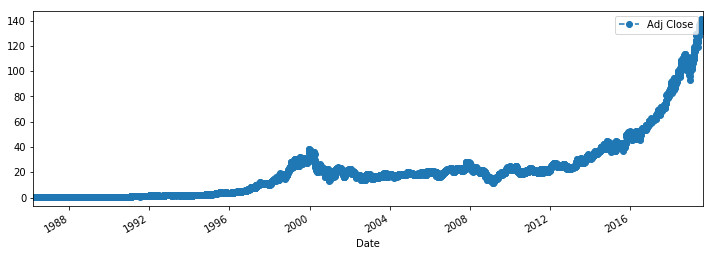

In [6]:
MSFT.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')

In [7]:
MSFT.describe()

count    8432.000000
mean       22.155786
std        25.366915
min         0.058279
25%         2.120091
50%        18.401687
75%        25.029620
max       140.870895
Name: Adj Close, dtype: float64

In [8]:
df = MSFT
df.head()

Date
1986-03-13    0.062761
1986-03-14    0.065003
1986-03-17    0.066124
1986-03-18    0.064443
1986-03-19    0.063322
Name: Adj Close, dtype: float64

In [9]:
df.describe()

count    8432.000000
mean       22.155786
std        25.366915
min         0.058279
25%         2.120091
50%        18.401687
75%        25.029620
max       140.870895
Name: Adj Close, dtype: float64

In [10]:
df = df.reset_index()

In [11]:
df.head()

,Date,Adj Close
0,1986-03-13,0.062761
1,1986-03-14,0.065003
2,1986-03-17,0.066124
3,1986-03-18,0.064443
4,1986-03-19,0.063322


In [12]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [13]:

df = df[['ds','y']]
df.head()

,ds,y
0,1986-03-13,0.062761
1,1986-03-14,0.065003
2,1986-03-17,0.066124
3,1986-03-18,0.064443
4,1986-03-19,0.063322


In [14]:
# Importing the prophet library:

import fbprophet

In [15]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [16]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Rakshit\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [17]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
8792,2020-08-18
8793,2020-08-19
8794,2020-08-20
8795,2020-08-21
8796,2020-08-22


In [18]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8792,2020-08-18,123.720858,116.843922,130.454627,122.330587,125.121922,0.157763,0.157763,0.157763,-0.059047,-0.059047,-0.059047,0.216810,0.216810,0.216810,0.0,0.0,0.0,123.878621
8793,2020-08-19,123.759975,117.443567,130.970221,122.365299,125.174811,0.131858,0.131858,0.131858,-0.050231,-0.050231,-0.050231,0.182089,0.182089,0.182089,0.0,0.0,0.0,123.891833
8794,2020-08-20,123.799091,116.496202,130.184195,122.400012,125.227699,0.111881,0.111881,0.111881,-0.033392,-0.033392,-0.033392,0.145273,0.145273,0.145273,0.0,0.0,0.0,123.910972
8795,2020-08-21,123.838207,117.519060,130.801244,122.434724,125.280588,0.094210,0.094210,0.094210,-0.012341,-0.012341,-0.012341,0.106551,0.106551,0.106551,0.0,0.0,0.0,123.932417
8796,2020-08-22,123.877324,117.570890,130.888962,122.469437,125.331811,0.156810,0.156810,0.156810,0.090631,0.090631,0.090631,0.066180,0.066180,0.066180,0.0,0.0,0.0,124.034134


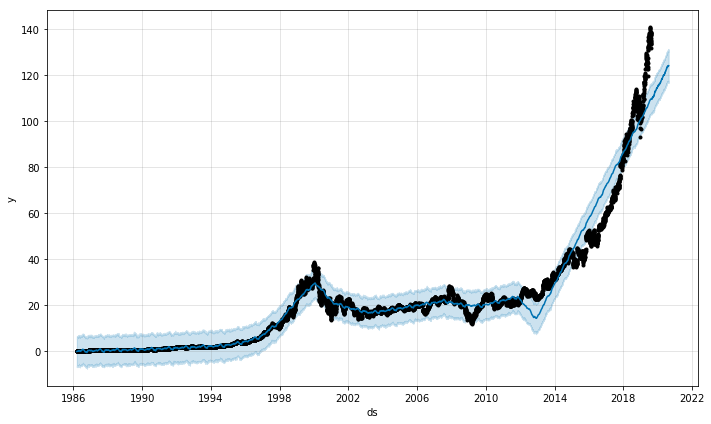

In [19]:
# Visualisation:

m.plot(forecast);

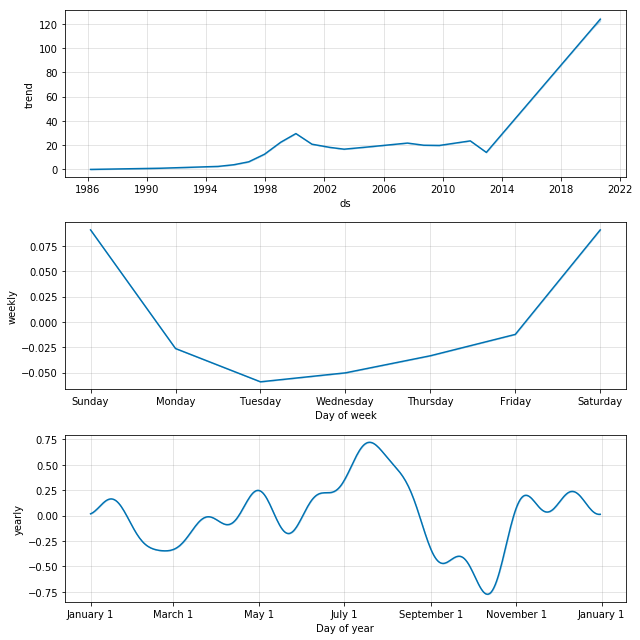

In [20]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [21]:
df.describe()

,y
count,8432.000000
mean,22.155786
std,25.366915
min,0.058279
25%,2.120091
50%,18.401687
75%,25.029620
max,140.870895


In [22]:
df.shape

(8432, 2)

In [23]:
forecast.shape

(8797, 19)

In [24]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.0,8797.0,8797.0,8797.000000
mean,26.112059,19.679865,32.484522,26.093636,26.126844,-0.031348,-0.031348,-0.031348,-0.035015,-0.035015,-0.035015,0.003666,0.003666,0.003666,0.0,0.0,0.0,26.080711
std,30.769490,30.774105,30.794771,30.712946,30.815397,0.331134,0.331134,0.331134,0.021647,0.021647,0.021647,0.330375,0.330375,0.330375,0.0,0.0,0.0,30.781127
min,-0.117667,-7.819541,5.082499,-0.117667,-0.117667,-0.832710,-0.832710,-0.832710,-0.059047,-0.059047,-0.059047,-0.773663,-0.773663,-0.773663,0.0,0.0,0.0,-0.825325
25%,2.443099,-3.840970,8.998221,2.443099,2.443099,-0.249368,-0.249368,-0.249368,-0.050231,-0.050231,-0.050231,-0.216243,-0.216243,-0.216243,0.0,0.0,0.0,2.535165
50%,19.328279,12.745460,25.479109,19.328279,19.328279,-0.001519,-0.001519,-0.001519,-0.033392,-0.033392,-0.033392,0.035136,0.035136,0.035136,0.0,0.0,0.0,19.106110
75%,24.500104,17.940258,30.841151,24.500104,24.500104,0.165751,0.165751,0.165751,-0.026250,-0.026250,-0.026250,0.199774,0.199774,0.199774,0.0,0.0,0.0,24.389625
max,123.877324,117.570890,131.341821,122.469437,125.331811,0.811174,0.811174,0.811174,0.090631,0.090631,0.090631,0.720543,0.720543,0.720543,0.0,0.0,0.0,124.034134
